In [23]:
import os
import re
import requests
from io import StringIO 

import gspread
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# Tokenizer 
from transformers import T5Tokenizer
# PyTorch model 
from transformers import T5Model, T5ForConditionalGeneration

# Extracting data from summaries sheet

In [2]:
sheet_url = "https://docs.google.com/spreadsheet/ccc?key=1H7l1w0qORvyRsF07TvK8g4Bz63tdLwpqLOaXhVkw9lQ&output=csv"
r = requests.get(sheet_url)
data = r.content
decoded_data = data.decode()

In [3]:
df = pd.read_csv(StringIO(decoded_data), index_col=1)
df.head()

,data_publicada,url,nome_arquivo,responsavel,passagem_1,passagem_2,passagem_3,passagem_4,passagem_5,qtde_tokens_pass_1,qtde_tokens_pass_2,qtde_tokens_pass_3,qtde_tokens_pass_4,qtde_tokens_pass_5,qtde_total_tokens
titulo_publicado,,,,,,,,,,,,,,,
187-2023-PRE-Ofício Circular,2023-11-09,https://www.b3.com.br/data/files/73/E7/C5/27/2...,2023-11-09|187-2023-PRE-Ofício Circular.pdf,Gabriel,"a partir de 13/11/2023, inclusive, será altera...",A regra de cadastro automático de vencimentos ...,os demais termos do Contrato Futuro de Cupom d...,A regra vigente de cadastro automático e cadas...,Esclarecimentos adicionais poderão ser obtidos...,22.0,25.0,21.0,19.0,11.0,98
107-2023-VNC-Comunicado Externo,2023-11-09,https://www.b3.com.br/data/files/78/67/00/8C/C...,2023-11-09|107-2023-VNC-Comunicado Externo.pdf,Gabriel,a data para a entrada do serviço em ambiente d...,"em 11/11/2023 entre 10h30 e 12h30, haverá exce...","possibilidade de realizar, no dia supracitado,...",Esclarecimentos adicionais poderão ser obtidos...,NaN,17.0,16.0,12.0,12.0,NaN,57
058-2023-VPC-Comunicado Externo,2023-11-09,https://www.b3.com.br/data/files/43/00/01/01/9...,2023-11-09|058-2023-VPC-Comunicado Externo.pdf,Gabriel,"em 27/10/2023, a Receita Federal do Brasil (RF...",prevê a obrigatoriedade do envio das informaçõ...,A partir do aprendizado gerado pelas fases ant...,NaN,NaN,14.0,14.0,31.0,NaN,NaN,59
059-2023-VPC-Comunicado Externo,2023-11-09,https://www.b3.com.br/data/files/31/60/A7/FF/A...,2023-11-09|059-2023-VPC-Comunicado Externo.pdf,Gabriel,"A B3 informa que, no dia 13/11/2023, atualizar...",Registro emissor CVM (Sim ou Não); e Fase (Ope...,A marcação de EGEM ou EFRF será retirada,A atualização em referência será realizada par...,Esclarecimentos adicionais poderão ser obtidos...,26.0,11.0,8.0,16.0,12.0,73
186-2023-PRE-Ofício Circular,2023-11-09,https://www.b3.com.br/data/files/0F/44/94/03/7...,2023-11-09|186-2023-PRE-Ofício Circular.pdf,Gabriel,"a partir de 27/11/2023, serão implementados no...",Será estabelecida simplificação do parâmetro d...,O parâmetro de quantidade para a submissão de ...,Para apuração do fracionamento do volume negoc...,Ressaltamos que as novas regras e parâmetros s...,57.0,26.0,32.0,39.0,21.0,175


In [4]:
data_df = df[
    (df["qtde_total_tokens"] != 0) &
    (df["qtde_total_tokens"].notnull())
    ]

In [5]:
data_df

,data_publicada,url,nome_arquivo,responsavel,passagem_1,passagem_2,passagem_3,passagem_4,passagem_5,qtde_tokens_pass_1,qtde_tokens_pass_2,qtde_tokens_pass_3,qtde_tokens_pass_4,qtde_tokens_pass_5,qtde_total_tokens
titulo_publicado,,,,,,,,,,,,,,,
187-2023-PRE-Ofício Circular,2023-11-09,https://www.b3.com.br/data/files/73/E7/C5/27/2...,2023-11-09|187-2023-PRE-Ofício Circular.pdf,Gabriel,"a partir de 13/11/2023, inclusive, será altera...",A regra de cadastro automático de vencimentos ...,os demais termos do Contrato Futuro de Cupom d...,A regra vigente de cadastro automático e cadas...,Esclarecimentos adicionais poderão ser obtidos...,22.0,25.0,21.0,19.0,11.0,98
107-2023-VNC-Comunicado Externo,2023-11-09,https://www.b3.com.br/data/files/78/67/00/8C/C...,2023-11-09|107-2023-VNC-Comunicado Externo.pdf,Gabriel,a data para a entrada do serviço em ambiente d...,"em 11/11/2023 entre 10h30 e 12h30, haverá exce...","possibilidade de realizar, no dia supracitado,...",Esclarecimentos adicionais poderão ser obtidos...,NaN,17.0,16.0,12.0,12.0,NaN,57
058-2023-VPC-Comunicado Externo,2023-11-09,https://www.b3.com.br/data/files/43/00/01/01/9...,2023-11-09|058-2023-VPC-Comunicado Externo.pdf,Gabriel,"em 27/10/2023, a Receita Federal do Brasil (RF...",prevê a obrigatoriedade do envio das informaçõ...,A partir do aprendizado gerado pelas fases ant...,NaN,NaN,14.0,14.0,31.0,NaN,NaN,59
059-2023-VPC-Comunicado Externo,2023-11-09,https://www.b3.com.br/data/files/31/60/A7/FF/A...,2023-11-09|059-2023-VPC-Comunicado Externo.pdf,Gabriel,"A B3 informa que, no dia 13/11/2023, atualizar...",Registro emissor CVM (Sim ou Não); e Fase (Ope...,A marcação de EGEM ou EFRF será retirada,A atualização em referência será realizada par...,Esclarecimentos adicionais poderão ser obtidos...,26.0,11.0,8.0,16.0,12.0,73
186-2023-PRE-Ofício Circular,2023-11-09,https://www.b3.com.br/data/files/0F/44/94/03/7...,2023-11-09|186-2023-PRE-Ofício Circular.pdf,Gabriel,"a partir de 27/11/2023, serão implementados no...",Será estabelecida simplificação do parâmetro d...,O parâmetro de quantidade para a submissão de ...,Para apuração do fracionamento do volume negoc...,Ressaltamos que as novas regras e parâmetros s...,57.0,26.0,32.0,39.0,21.0,175


# Recovering documents data

In [6]:
save_path = "/home/gabriel/Documentos/projects/poli-capstone-project/data/"

In [81]:
docs_cols = [
    "published_date", 
    "published_title", 
    "published_abstract", 
    "published_subject", 
    "url",
    "file_name",
    "pypdfium_extraction"
]
docs_df = pd.read_parquet(f"{save_path}list_b3_pdf_comparison.parquet", engine="pyarrow")
docs_df = docs_df[docs_cols]

# Filtering only docs related to 2023 year
docs_df = docs_df[docs_df["published_date"].dt.year == 2023]

In [82]:
docs_df.head()

,published_date,published_title,published_abstract,published_subject,url,file_name,pypdfium_extraction
0,2023-11-09,187-2023-PRE-Ofício Circular,"Informamos que, a partir de 13/11/2023, inclus...",Alteração na Regra de Cadastro Automático de V...,https://www.b3.com.br/data/files/73/E7/C5/27/2...,2023-11-09|187-2023-PRE-Ofício Circular.pdf,Este documento produz efeitos a partir da data...
1,2023-11-09,107-2023-VNC-Comunicado Externo,"A B3 informa que, conforme Comunicado Externo ...",Lançamento das sessões de Renda Fixa Trademate,https://www.b3.com.br/data/files/78/67/00/8C/C...,2023-11-09|107-2023-VNC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...
2,2023-11-09,058-2023-VPC-Comunicado Externo,"Informamos que, em 27/10/2023, a Receita Feder...",Imposto de Renda da Pessoa Física (IRPF) – Cál...,https://www.b3.com.br/data/files/43/00/01/01/9...,2023-11-09|058-2023-VPC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...
3,2023-11-09,059-2023-VPC-Comunicado Externo,"A B3 informa que, os dados indicados neste Com...",Atualização cadastral de companhias emissoras ...,https://www.b3.com.br/data/files/31/60/A7/FF/A...,2023-11-09|059-2023-VPC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...
4,2023-11-09,186-2023-PRE-Ofício Circular,"Informamos que, a partir de 27/11/2023, serão ...",Novas Regras e Parâmetros para Procedimentos E...,https://www.b3.com.br/data/files/0F/44/94/03/7...,2023-11-09|186-2023-PRE-Ofício Circular.pdf,Este documento produz efeitos a partir da data...


# Pre-processing documents

In [83]:
pattern_1 = r"\r\n|\n|\r"
pattern_2 = r"Este documento.*?Fax.*?PUBLIC INFORMATION "

docs_df["cleaned_extraction"] = (
    docs_df["pypdfium_extraction"]
    .str.replace(pattern_1, " ", regex=True) # Remove line breaks
    .str.replace(pattern_2, "", regex=True) # Clean Header and Footer
)

docs_df.index = docs_df["published_title"]
docs_df.drop(columns="published_title", inplace=True)

docs_df.head()

,published_date,published_abstract,published_subject,url,file_name,pypdfium_extraction,cleaned_extraction
published_title,,,,,,,
187-2023-PRE-Ofício Circular,2023-11-09,"Informamos que, a partir de 13/11/2023, inclus...",Alteração na Regra de Cadastro Automático de V...,https://www.b3.com.br/data/files/73/E7/C5/27/2...,2023-11-09|187-2023-PRE-Ofício Circular.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 187/2023-PRE OFÍCIO CIRC...
107-2023-VNC-Comunicado Externo,2023-11-09,"A B3 informa que, conforme Comunicado Externo ...",Lançamento das sessões de Renda Fixa Trademate,https://www.b3.com.br/data/files/78/67/00/8C/C...,2023-11-09|107-2023-VNC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 107/2023-VNC COMUNICADO ...
058-2023-VPC-Comunicado Externo,2023-11-09,"Informamos que, em 27/10/2023, a Receita Feder...",Imposto de Renda da Pessoa Física (IRPF) – Cál...,https://www.b3.com.br/data/files/43/00/01/01/9...,2023-11-09|058-2023-VPC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 058/2023-VPC COMUNICADO ...
059-2023-VPC-Comunicado Externo,2023-11-09,"A B3 informa que, os dados indicados neste Com...",Atualização cadastral de companhias emissoras ...,https://www.b3.com.br/data/files/31/60/A7/FF/A...,2023-11-09|059-2023-VPC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 059/2023-VPC COMUNICADO ...
186-2023-PRE-Ofício Circular,2023-11-09,"Informamos que, a partir de 27/11/2023, serão ...",Novas Regras e Parâmetros para Procedimentos E...,https://www.b3.com.br/data/files/0F/44/94/03/7...,2023-11-09|186-2023-PRE-Ofício Circular.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 186/2023-PRE OFÍCIO CIRC...


In [84]:
docs_df.describe()

,published_date
count,422
mean,2023-06-14 20:59:08.815165952
min,2023-01-03 00:00:00
25%,2023-04-11 06:00:00
50%,2023-06-20 00:00:00
75%,2023-08-27 18:00:00
max,2023-11-09 00:00:00


Now, we want to select only the documents from 2023 year that are not the lengthiest nor the smallest ones.

In [85]:
docs_df["tokens_amount"] = docs_df["cleaned_extraction"].str.split().str.len()

In [86]:
quantiles = docs_df["tokens_amount"].quantile([0.25,0.5,0.75])

quantiles

0.25    209.25
0.50    355.50
0.75    937.25
Name: tokens_amount, dtype: float64

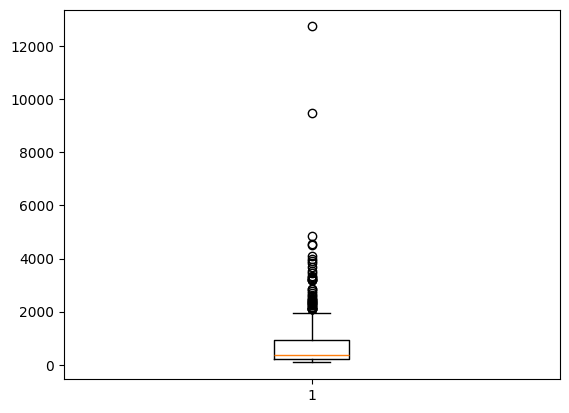

In [87]:
plt.boxplot(docs_df["tokens_amount"])

plt.show()

In [88]:
filtered_docs_df = docs_df[
    (docs_df["tokens_amount"] > quantiles[0.25]) &
    (docs_df["tokens_amount"] < quantiles[0.75])
]

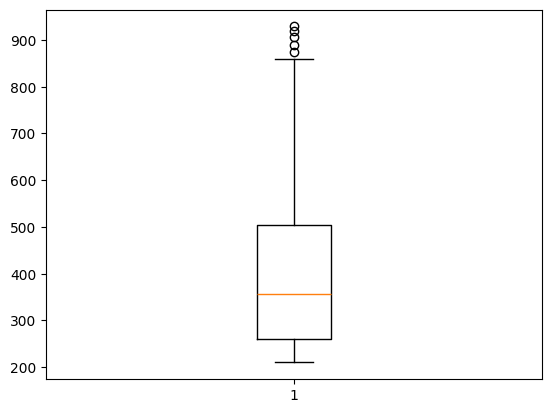

In [89]:
plt.boxplot(filtered_docs_df["tokens_amount"])

plt.show()

In [90]:
filtered_docs_df.describe()

,published_date,tokens_amount
count,210,210.000000
mean,2023-06-19 12:27:25.714285824,415.238095
min,2023-01-03 00:00:00,210.000000
25%,2023-04-20 00:00:00,260.500000
50%,2023-06-21 00:00:00,355.500000
75%,2023-08-27 18:00:00,503.500000
max,2023-11-09 00:00:00,929.000000
std,NaN,189.497094


'/home/gabriel/Documentos/projects/poli-capstone-project/data/txt'

In [119]:
os.getcwd()

'/home/gabriel/Documentos/projects/poli-capstone-project/notebooks'

In [122]:
filtered_docs_df

,published_date,published_abstract,published_subject,url,file_name,pypdfium_extraction,cleaned_extraction,tokens_amount
published_title,,,,,,,,
187-2023-PRE-Ofício Circular,2023-11-09,"Informamos que, a partir de 13/11/2023, inclus...",Alteração na Regra de Cadastro Automático de V...,https://www.b3.com.br/data/files/73/E7/C5/27/2...,2023-11-09|187-2023-PRE-Ofício Circular.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 187/2023-PRE OFÍCIO CIRC...,289
107-2023-VNC-Comunicado Externo,2023-11-09,"A B3 informa que, conforme Comunicado Externo ...",Lançamento das sessões de Renda Fixa Trademate,https://www.b3.com.br/data/files/78/67/00/8C/C...,2023-11-09|107-2023-VNC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 107/2023-VNC COMUNICADO ...,293
058-2023-VPC-Comunicado Externo,2023-11-09,"Informamos que, em 27/10/2023, a Receita Feder...",Imposto de Renda da Pessoa Física (IRPF) – Cál...,https://www.b3.com.br/data/files/43/00/01/01/9...,2023-11-09|058-2023-VPC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 058/2023-VPC COMUNICADO ...,660
186-2023-PRE-Ofício Circular,2023-11-09,"Informamos que, a partir de 27/11/2023, serão ...",Novas Regras e Parâmetros para Procedimentos E...,https://www.b3.com.br/data/files/0F/44/94/03/7...,2023-11-09|186-2023-PRE-Ofício Circular.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 186/2023-PRE OFÍCIO CIRC...,402
108-2023-VNC-Comunicado Externo,2023-11-09,Informamos que as especificações técnicas do D...,EntryPoint – Interface de envio de ordens: nov...,https://www.b3.com.br/data/files/60/F7/D0/49/E...,2023-11-09|108-2023-VNC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...,9 de novembro de 2023 108/2023-VNC COMUNICADO ...,720
...,...,...,...,...,...,...,...,...
003-2023-VNC-Comunicado Externo,2023-01-10,Informamos que o serviço de pós-negociação Cle...,Nova tela de consultas no Módulo CVA – consult...,https://www.b3.com.br/data/files/92/31/AE/59/0...,2023-01-10|003-2023-VNC-Comunicado Externo.pdf,Este documento produz efeitos a partir da data...,10 de janeiro de 2023 003/2023-VNC COMUNICADO ...,320
001-2023-PRE-Ofício Circular,2023-01-10,"Informamos que, em 12/01/2023, entrará em vigo...",Atualização no Regulamento do Balcão B3,https://www.b3.com.br/data/files/CA/C7/5F/27/E...,2023-01-10|001-2023-PRE-Ofício Circular.pdf,Este documento produz efeitos a partir da data...,10 de janeiro de 2023 001/2023-PRE OFÍCIO CIRC...,224
002-2023-VNC-Ofício Circular,2023-01-05,"Informamos que, a partir de 16/01/2023, vigora...",Atualização dos Valores das Contribuições para...,https://www.b3.com.br/data/files/A9/97/AE/05/6...,2023-01-05|002-2023-VNC-Ofício Circular.pdf,Este documento produz efeitos a partir da data...,5 de janeiro de 2023 002/2023-VNC OFÍCIO CIRCU...,407


In [126]:
txt_base_path = f"{save_path}txt/"
processed_files = []

for row in filtered_docs_df.iterrows():
    txt_file_name = row[1]["file_name"].replace(".pdf", ".txt")
    txt_file_path = f"{txt_base_path}{txt_file_name}"
    txt_file_content = row[1]["cleaned_extraction"]

    try:
        with open(txt_file_path, "w") as f:
            f.write(txt_file_content)
            processed_files.append(txt_file_name)
    except:
        print("Error found, reseting processed files...")
        for f in processed_files:
            os.remove(f"{txt_base_path}{f}")
    finally:
        print(f"Processed {len(processed_files)} files from {filtered_docs_df.shape[0]} original entries.")

Processed 1 files from 210 original entries.
Processed 2 files from 210 original entries.
Processed 3 files from 210 original entries.
Processed 4 files from 210 original entries.
Processed 5 files from 210 original entries.
Processed 6 files from 210 original entries.
Processed 7 files from 210 original entries.
Processed 8 files from 210 original entries.
Processed 9 files from 210 original entries.
Processed 10 files from 210 original entries.
Processed 11 files from 210 original entries.
Processed 12 files from 210 original entries.
Processed 13 files from 210 original entries.
Processed 14 files from 210 original entries.
Processed 15 files from 210 original entries.
Processed 16 files from 210 original entries.
Processed 17 files from 210 original entries.
Processed 18 files from 210 original entries.
Processed 19 files from 210 original entries.
Processed 20 files from 210 original entries.
Processed 21 files from 210 original entries.
Processed 22 files from 210 original entrie

In [97]:
output_sheet_prep = (
    filtered_docs_df
    .assign(
        responsavel="",
        passagem_1="",
        passagem_2="",
        passagem_3="",
        passagem_4="",
        passagem_5="",
        qtde_tokens_pass_1="",
        qtde_tokens_pass_2="",
        qtde_tokens_pass_3="",
        qtde_tokens_pass_4="",
        qtde_tokens_pass_5="",
        qtde_total_tokens="",
    )
    .reset_index()
    .rename(
        columns={
            "published_title": "titulo_publicado",
            "published_date": "data_publicada", 
            "file_name": "nome_arquivo"
        }
    )
)

output_sheet_cols = [
    "data_publicada", 
    "titulo_publicado", 
    "url", 
    "nome_arquivo", 
    "responsavel", 
    "passagem_1", 
    "passagem_2", 
    "passagem_3", 
    "passagem_4", 
    "passagem_5", 
    "qtde_tokens_pass_1", 
    "qtde_tokens_pass_2", 
    "qtde_tokens_pass_3", 
    "qtde_tokens_pass_4", 
    "qtde_tokens_pass_5", 
    "qtde_total_tokens"
]

output_sheet = output_sheet_prep[output_sheet_cols]
output_sheet.head()

,data_publicada,titulo_publicado,url,nome_arquivo,responsavel,passagem_1,passagem_2,passagem_3,passagem_4,passagem_5,qtde_tokens_pass_1,qtde_tokens_pass_2,qtde_tokens_pass_3,qtde_tokens_pass_4,qtde_tokens_pass_5,qtde_total_tokens
0,2023-11-09,187-2023-PRE-Ofício Circular,https://www.b3.com.br/data/files/73/E7/C5/27/2...,2023-11-09|187-2023-PRE-Ofício Circular.pdf,,,,,,,,,,,,
1,2023-11-09,107-2023-VNC-Comunicado Externo,https://www.b3.com.br/data/files/78/67/00/8C/C...,2023-11-09|107-2023-VNC-Comunicado Externo.pdf,,,,,,,,,,,,
2,2023-11-09,058-2023-VPC-Comunicado Externo,https://www.b3.com.br/data/files/43/00/01/01/9...,2023-11-09|058-2023-VPC-Comunicado Externo.pdf,,,,,,,,,,,,
3,2023-11-09,186-2023-PRE-Ofício Circular,https://www.b3.com.br/data/files/0F/44/94/03/7...,2023-11-09|186-2023-PRE-Ofício Circular.pdf,,,,,,,,,,,,
4,2023-11-09,108-2023-VNC-Comunicado Externo,https://www.b3.com.br/data/files/60/F7/D0/49/E...,2023-11-09|108-2023-VNC-Comunicado Externo.pdf,,,,,,,,,,,,


In [128]:
data_dir = "/home/gabriel/Documentos/projects/poli-capstone-project/data/"
data_file = "filtered_docs.parquet"
data_file_path = f"{data_dir}{data_file}"

filtered_docs_df.to_parquet(data_file_path)

In [100]:
output_sheet.to_csv(save_path + "filtered_b3_file_list_with_links.csv", index=False)

In [10]:
docs_to_merge = filtered_docs_df[["published_abstract", "published_subject", "pypdfium_extraction", "cleaned_extraction"]]

In [11]:
merged_df = (
    data_df
    .merge(docs_to_merge, left_index=True, right_index=True, how="left")
    .head()
)

In [12]:
merged_df.head()

,published_date,url,file_name,responsible,snippet_1,snippet_2,snippet_3,snippet_4,snippet_5,length,published_abstract,published_subject,pypdfium_extraction,cleaned_extraction
published_title,,,,,,,,,,,,,,
187-2023-PRE-Ofício Circular,2023-11-09,https://www.b3.com.br/data/files/73/E7/C5/27/2...,2023-11-09|187-2023-PRE-Ofício Circular.pdf,Gabriel,"a partir de 13/11/2023, inclusive, será altera...",A regra de cadastro automático de vencimentos ...,os demais termos do Contrato Futuro de Cupom d...,A regra vigente de cadastro automático e cadas...,Esclarecimentos adicionais poderão ser obtidos...,487.0,"Informamos que, a partir de 13/11/2023, inclus...",Alteração na Regra de Cadastro Automático de V...,Este documento produz efeitos a partir da data...,9 de novembro de 2023 187/2023-PRE OFÍCIO CIRC...
107-2023-VNC-Comunicado Externo,2023-11-09,https://www.b3.com.br/data/files/78/67/00/8C/C...,2023-11-09|107-2023-VNC-Comunicado Externo.pdf,Gabriel,a data para a entrada do serviço em ambiente d...,"em 11/11/2023 entre 10h30 e 12h30, haverá exce...","possibilidade de realizar, no dia supracitado,...",Esclarecimentos adicionais poderão ser obtidos...,NaN,393.0,"A B3 informa que, conforme Comunicado Externo ...",Lançamento das sessões de Renda Fixa Trademate,Este documento produz efeitos a partir da data...,9 de novembro de 2023 107/2023-VNC COMUNICADO ...
058-2023-VPC-Comunicado Externo,2023-11-09,https://www.b3.com.br/data/files/43/00/01/01/9...,2023-11-09|058-2023-VPC-Comunicado Externo.pdf,Gabriel,"em 27/10/2023, a Receita Federal do Brasil (RF...",prevê a obrigatoriedade do envio das informaçõ...,A partir do aprendizado gerado pelas fases ant...,NaN,NaN,402.0,"Informamos que, em 27/10/2023, a Receita Feder...",Imposto de Renda da Pessoa Física (IRPF) – Cál...,Este documento produz efeitos a partir da data...,9 de novembro de 2023 058/2023-VPC COMUNICADO ...
059-2023-VPC-Comunicado Externo,2023-11-09,https://www.b3.com.br/data/files/31/60/A7/FF/A...,2023-11-09|059-2023-VPC-Comunicado Externo.pdf,Gabriel,"A B3 informa que, no dia 13/11/2023, atualizar...",Registro emissor CVM (Sim ou Não); e Fase (Ope...,A marcação de EGEM ou EFRF será retirada,A atualização em referência será realizada par...,Esclarecimentos adicionais poderão ser obtidos...,501.0,"A B3 informa que, os dados indicados neste Com...",Atualização cadastral de companhias emissoras ...,Este documento produz efeitos a partir da data...,9 de novembro de 2023 059/2023-VPC COMUNICADO ...
186-2023-PRE-Ofício Circular,2023-11-09,https://www.b3.com.br/data/files/0F/44/94/03/7...,2023-11-09|186-2023-PRE-Ofício Circular.pdf,Gabriel,"a partir de 27/11/2023, serão implementados no...",Quantidade média negociada,Quantidade em relação ao capital social do emi...,Negociabilidade,Padronização de leilões de opções,269.0,"Informamos que, a partir de 27/11/2023, serão ...",Novas Regras e Parâmetros para Procedimentos E...,Este documento produz efeitos a partir da data...,9 de novembro de 2023 186/2023-PRE OFÍCIO CIRC...


In [27]:
token_name = 'unicamp-dl/ptt5-base-portuguese-vocab'
model_name = 'phpaiola/ptt5-base-summ-xlsum'
tokenizer = T5Tokenizer.from_pretrained(token_name )
model_pt = T5ForConditionalGeneration.from_pretrained(model_name)

def generate_single_t5_summary(text):
    inputs = tokenizer.encode(text, max_length=512, truncation=True, return_tensors='pt')
    summary_ids = model_pt.generate(inputs, max_length=256, min_length=32, num_beams=5, no_repeat_ngram_size=3, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0])
    return summary

In [29]:
text = merged_df[["cleaned_extraction"]].iloc[0, :][0]
text

/tmp/ipykernel_208559/3274754811.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = merged_df[["cleaned_extraction"]].iloc[0, :][0]


'9 de novembro de 2023 187/2023-PRE OFÍCIO CIRCULAR Participantes do Listado B3  Ref.: Alteração na Regra de Cadastro Automático de Vencimentos do  Futuro de Cupom de IPCA (DAP) Informamos que, a partir de 13/11/2023, inclusive, será alterada a regra para  cadastro automático de vencimentos do Contrato Futuro de Cupom de IPCA  (DAP).  A regra de cadastro automático de vencimentos foi revista, visando ampliar a  abertura de novos vencimentos curtos de DAP, de 3 primeiros meses para 6,  conforme tabela abaixo Regra até 10/11/2023 Regras do  contrato Cadastro automático Cadastro pré-aprovado Restrições Todos os meses 3 primeiros meses. 1º vencimento janeiro (não  contemplado nos 3 primeiros  meses). Até 15 anos: coincidente com  vencimento de NTN-B (maio e  agosto). Até 15 anos • Coincidente com pagamento de  juros de NTN-B (fevereiro, maio,  agosto e novembro). • Início de semestre. -Regra a partir de 13/11/2023 Regras do  contrato Cadastro automático Cadastro pré-aprovado Restrições Tod

In [30]:
print(generate_single_t5_summary(text))

<pad> A partir de 13 de novembro de 2023, o Banco Central (BC) vai mudar a regra de cadastro automático de vencimentos do Futuro de Cupom de Créditos (IPCA).</s>


In [31]:
text = merged_df[["cleaned_extraction"]].iloc[1, :][0]
text

/tmp/ipykernel_208559/3128727489.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = merged_df[["cleaned_extraction"]].iloc[1, :][0]


'9 de novembro de 2023 107/2023-VNC COMUNICADO EXTERNO Participantes do Balcão B3  Ref.: Lançamento das sessões de Renda Fixa Trademate A B3 informa que, conforme Comunicado Externo 104/2023-VNC, desde  08/11/2023, após o encerramento da negociação, estão disponíveis em  ambiente de certificação, as sessões de Renda Fixa Trademate: Market Data,  Order Entry e Drop Copy.  Com o intuito de prover tempo adicional para certificação dos participantes, a data para a entrada do serviço em ambiente de produção será postergada para  o dia 27/11/2023. Reforçamos que a certificação é obrigatória e deverá ser agendada previamente com a Superintendência de Listados – Certificação pelo telefone (11) 2565-5023 ou e-mail tradingcertification@b3.com.br.  Esclarecemos que, após a aprovação dos participantes em ambiente de  certificação, será concedido o acesso às sessões em produção.  A versão do Trademate a ser disponibilizada em ambiente de certificação  contemplará, além das Sessões FIX de Renda Fixa

In [32]:
generate_single_t5_summary(text)

'<pad> A Superintendência de Listados (STN, na sigla em inglês) do Serviço Nacional de Certificação (SNI) anunciou nesta sexta-feira que o serviço de certificação de Renda Fixa será disponibilizado em ambiente de certificação para os participantes do Balcão B3.</s>'

In [33]:
text = merged_df[["cleaned_extraction"]].iloc[2, :][0]
text

/tmp/ipykernel_208559/3645145852.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = merged_df[["cleaned_extraction"]].iloc[2, :][0]


'9 de novembro de 2023 058/2023-VPC COMUNICADO EXTERNO Participantes do Listado B3  Ref.: Imposto de Renda da Pessoa Física (IRPF) – Cálculo Darf e Declaração  Anual – ReVar Informamos que, em 27/10/2023, a Receita Federal do Brasil (RFB) publicou a Instrução Normativa RFB 2.164 (IN) que, dentre outros pontos, prevê a  obrigatoriedade do envio das informações de corretagem pelos participantes para a B3 – depositária central. Essa IN compreende mais uma das importantes etapas de implementação da calculadora ReVar, uma iniciativa conjunta da RFB e B3, para apuração de Imposto  de Renda de Pessoas Físicas (IRPF) em operações de renda variável. A ReVar trará aos investidores pessoas físicas segurança e transparência para se  manter em dia com as obrigações tributárias relacionadas às operações de renda  variável, facilitando sua jornada de investimentos. Em 24/10/2023, a RFB, com a participação da B3, apresentou ao mercado os  detalhes da IN, o cronograma de implementação da calculadora Re

In [34]:
generate_single_t5_summary(text)

'<pad> A Agência do Investidor da Bolsa de Valores de São Paulo (Sinacor) divulgou nesta sexta-feira o cronograma de implementação da calculadora ReVar, que prevê a obrigatoriedade do envio das informações de corretagem dos investidores em operações de renda variável.</s>'

In [35]:
text = merged_df[["cleaned_extraction"]].iloc[3, :][0]
text

/tmp/ipykernel_208559/3557193404.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = merged_df[["cleaned_extraction"]].iloc[3, :][0]


'9 de novembro de 2023 059/2023-VPC COMUNICADO EXTERNO Participantes do Balcão B3  Ref.: Atualização cadastral de companhias emissoras de valores mobiliários no  Balcão B3 A B3 informa que, no dia 13/11/2023, atualizará os seguintes dados relacionados  ao cadastro das companhias emissoras de valores mobiliários registradas na  Comissão de Valores Mobiliários (CVM) com status de registro ativo:  • Registro emissor CVM (Sim ou Não); e • Fase (Operacional ou pré-operacional). Para essa atualização, serão utilizadas as informações cadastrais das companhias  abertas publicadas no site da CVM, disponibilizadas em  https://dados.cvm.gov.br/dataset/cia_aberta-cad.  A marcação de EGEM ou EFRF será retirada, conforme critérios dos artigos 38 e 38-A da Resolução CVM 80, para regularização do cadastro das companhias  emissoras não registradas na CVM e cadastradas na B3 como Emissores com  Grande Exposição ao Mercado e Emissores Frequentes de Renda Fixa.  A atualização em referência será realizada 

In [36]:
generate_single_t5_summary(text)

'<pad> Empresas emissoras de valores mobiliários no Balcão B3, em São Paulo (SP), serão obrigadas a atualizar seus cadastros e informações cadastrais para a Comissão de Valores Mobiliários (CVM).</s>'

In [37]:
text = merged_df[["cleaned_extraction"]].iloc[4, :][0]
text

/tmp/ipykernel_208559/2560065442.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = merged_df[["cleaned_extraction"]].iloc[4, :][0]


'9 de novembro de 2023 186/2023-PRE OFÍCIO CIRCULAR Participantes do Listado B3  Ref.: Novas Regras e Parâmetros para Procedimentos Especiais de  Negociação Informamos que, a partir de 27/11/2023, serão implementados novos  parâmetros simplificados para procedimentos especiais de negociação, conforme  descrito a seguir, em virtude da publicação da Resolução CVM 135, que revogou  a Instrução CVM 168, e estabeleceu que as entidades administradoras de  mercado organizado devem desenvolver e manter regras de organização e  funcionamento de seus ambientes e sistemas de negociação. Quantidade média negociada Será estabelecida simplificação do parâmetro de leilão, que equivalerá a 20 vezes  a média nacional negociada, acompanhada de redução no tempo de leilão para  5 minutos. Quantidade em relação ao capital social do emissor Com o objetivo de abranger tanto as ações ordinárias quanto as preferenciais em  relação ao capital social do emissor, os valores serão consolidados em apenas um  parâme

In [38]:
generate_single_t5_summary(text)

'<pad> A Comissão de Valores Múltiplos (CVM) aprovou nesta quarta-feira uma nova regra para o leilão de ativos, que será realizado a partir de 27 de novembro.</s>'